# Data Preprocess

In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
df = pd.read_pickle('22mdata.pkl')
df

,kdcode,dt,open,close,high,low,turnover,volume
0,000001.SH,2020-01-02,3066.3357,3085.1976,3098.1001,3066.3357,3.271971e+11,2.924702e+10
1,000001.SH,2020-01-03,3089.0220,3083.7858,3093.8192,3074.5178,2.899917e+11,2.614967e+10
2,000001.SH,2020-01-06,3070.9088,3083.4083,3107.2032,3065.3088,3.311825e+11,3.125758e+10
3,000001.SH,2020-01-07,3085.4882,3104.8015,3105.4507,3084.3290,2.881592e+11,2.765831e+10
4,000001.SH,2020-01-08,3094.2389,3066.8925,3094.2389,3059.1313,3.065174e+11,2.978726e+10
...,...,...,...,...,...,...,...,...
1974404,SPX.GI,2020-02-04,3280.6100,3297.5900,3306.9200,3280.6100,NaN,3.995320e+09
1974405,SPX.GI,2020-02-05,3324.9100,3334.6900,3337.5800,3313.7500,NaN,4.117730e+09
1974406,SPX.GI,2020-02-06,3344.9200,3345.7800,3347.9600,3334.3900,NaN,3.868370e+09
1974407,SPX.GI,2020-02-07,3335.5400,3327.7100,3341.4200,3322.1200,NaN,3.730650e+09


## Add label

In [3]:
df_open2 = df['open'].iloc[1:].values
df_open1 = df['close'].iloc[:-1].values

pre_label = df_open2 - df_open1
pre_label[pre_label >= 0] = 1
pre_label[pre_label < 0] = 0
pre_label = list(pre_label)
pre_label.append(0)
df['label'] = pre_label
df

,kdcode,dt,open,close,high,low,turnover,volume,label
0,000001.SH,2020-01-02,3066.3357,3085.1976,3098.1001,3066.3357,3.271971e+11,2.924702e+10,1.0
1,000001.SH,2020-01-03,3089.0220,3083.7858,3093.8192,3074.5178,2.899917e+11,2.614967e+10,0.0
2,000001.SH,2020-01-06,3070.9088,3083.4083,3107.2032,3065.3088,3.311825e+11,3.125758e+10,1.0
3,000001.SH,2020-01-07,3085.4882,3104.8015,3105.4507,3084.3290,2.881592e+11,2.765831e+10,0.0
4,000001.SH,2020-01-08,3094.2389,3066.8925,3094.2389,3059.1313,3.065174e+11,2.978726e+10,1.0
...,...,...,...,...,...,...,...,...,...
1974404,SPX.GI,2020-02-04,3280.6100,3297.5900,3306.9200,3280.6100,NaN,3.995320e+09,1.0
1974405,SPX.GI,2020-02-05,3324.9100,3334.6900,3337.5800,3313.7500,NaN,4.117730e+09,1.0
1974406,SPX.GI,2020-02-06,3344.9200,3345.7800,3347.9600,3334.3900,NaN,3.868370e+09,0.0
1974407,SPX.GI,2020-02-07,3335.5400,3327.7100,3341.4200,3322.1200,NaN,3.730650e+09,0.0


## Normalization

In [4]:
nor_colomns = ['open', 'close', 'high', 'low', 'turnover', 'volume']
res_df = df[nor_colomns]
tmp_df = res_df.copy()

In [5]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
df_nor = robustScaler.fit_transform(res_df)
df_nor = pd.DataFrame(df_nor, columns=res_df.columns)
df_nor

,open,close,high,low,turnover,volume
0,145.638358,146.359979,143.641605,149.039302,1321.877388,1412.140379
1,146.719828,146.292759,143.442386,149.438429,1171.526857,1262.550382
2,145.856360,146.274785,144.065234,148.989210,1337.982870,1509.242669
3,146.551369,147.293380,143.983678,149.917024,1164.121633,1335.411961
4,146.968521,145.488418,143.461917,148.687868,1238.308688,1438.231577
...,...,...,...,...,...,...
1974404,155.852946,156.472626,153.359410,159.491707,NaN,192.582736
1974405,157.964755,158.239070,154.786227,161.108293,NaN,198.494656
1974406,158.918644,158.767098,155.269279,162.115122,NaN,186.451551
1974407,158.471493,157.906731,154.964928,161.516585,NaN,179.800218


In [6]:
df_sub_columns = [c for c in df.columns if c not in df_nor.columns]
df_nor[df_sub_columns] = df[df_sub_columns]
df_nor = df_nor[df.columns]
df_nor = df_nor.fillna(0)
df_nor

,kdcode,dt,open,close,high,low,turnover,volume,label
0,000001.SH,2020-01-02,145.638358,146.359979,143.641605,149.039302,1321.877388,1412.140379,1.0
1,000001.SH,2020-01-03,146.719828,146.292759,143.442386,149.438429,1171.526857,1262.550382,0.0
2,000001.SH,2020-01-06,145.856360,146.274785,144.065234,148.989210,1337.982870,1509.242669,1.0
3,000001.SH,2020-01-07,146.551369,147.293380,143.983678,149.917024,1164.121633,1335.411961,0.0
4,000001.SH,2020-01-08,146.968521,145.488418,143.461917,148.687868,1238.308688,1438.231577,1.0
...,...,...,...,...,...,...,...,...,...
1974404,SPX.GI,2020-02-04,155.852946,156.472626,153.359410,159.491707,0.000000,192.582736,1.0
1974405,SPX.GI,2020-02-05,157.964755,158.239070,154.786227,161.108293,0.000000,198.494656,1.0
1974406,SPX.GI,2020-02-06,158.918644,158.767098,155.269279,162.115122,0.000000,186.451551,0.0
1974407,SPX.GI,2020-02-07,158.471493,157.906731,154.964928,161.516585,0.000000,179.800218,0.0


## Analasis

count    1.974409e+06
mean     2.159812e+01
std      1.235095e+02
min     -5.305183e-01
25%     -2.402043e-01
50%      0.000000e+00
75%      6.089428e-01
max      8.356776e+03
Name: open, dtype: float64

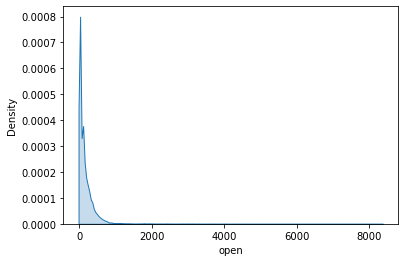

count    1.974409e+06
mean     2.160335e+01
std      1.235754e+02
min     -5.299331e-01
25%     -2.399697e-01
50%      0.000000e+00
75%      6.099230e-01
max      8.265041e+03
Name: close, dtype: float64

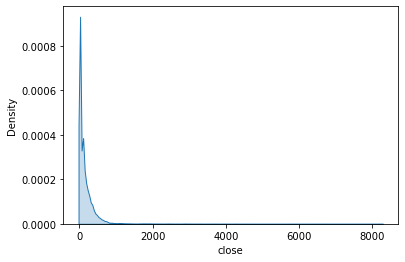

count    1.974409e+06
mean     2.153247e+01
std      1.234482e+02
min     -5.279265e-01
25%     -2.397554e-01
50%      0.000000e+00
75%      6.098960e-01
max      8.274545e+03
Name: high, dtype: float64

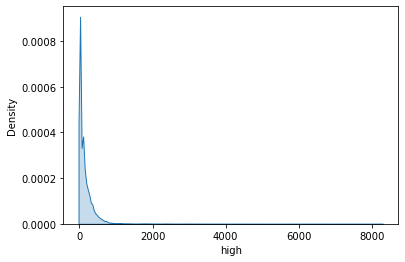

count    1.974409e+06
mean     2.167742e+01
std      1.236514e+02
min     -5.326829e-01
25%     -2.404878e-01
50%      0.000000e+00
75%      6.091043e-01
max      7.990333e+03
Name: low, dtype: float64

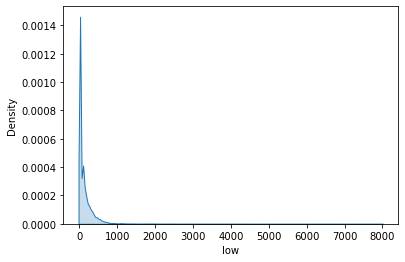

count    1.974409e+06
mean     7.054618e+00
std      8.670732e+01
min     -3.565420e-01
25%     -2.258974e-01
50%      0.000000e+00
75%      7.740465e-01
max      6.602155e+03
Name: turnover, dtype: float64

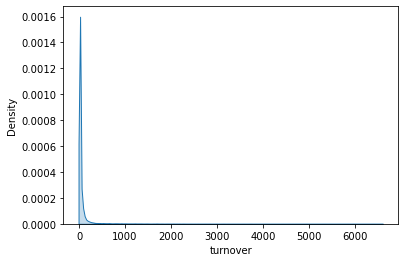

count    1.974409e+06
mean     6.373440e+00
std      7.743816e+01
min     -3.754768e-01
25%     -2.374323e-01
50%      0.000000e+00
75%      7.625664e-01
max      6.485830e+03
Name: volume, dtype: float64

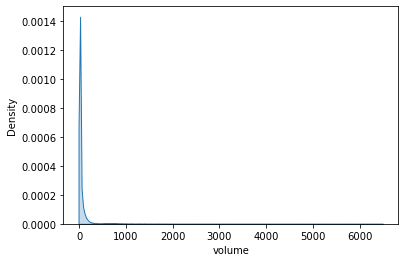

In [7]:
df_nor['volume'].describe()
for col in nor_colomns:
    display(df_nor[col].describe())
    sns.kdeplot(df_nor[col], shade=True)
    plt.show()

## Split training and test sets

In [8]:
df_nor.set_index(['dt'])
dateSepVal = pd.to_datetime('2020-12-31')
train_df = df_nor[df_nor['dt'] <= dateSepVal]
test_df = df_nor[df_nor['dt'] > dateSepVal]

train_df.to_pickle('22mdata.train.pkl')
test_df.to_pickle('22mdata.test.pkl')